In [ ]:
################################
#### IMPORTS AND INICIALIZATIONS
################################

import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
from matplotlib import pyplot as plt

data = 'RAVEN/TrialRightWrong/Trial'

# All the files we need
files = ['/DEI_trial_by_trial_Right.xlsx', 
         '/DEI_trial_by_trial_Wrong.xlsx', 
         '/esec_trial_by_trial_Right.xlsx',
         '/esec_trial_by_trial_Wrong.xlsx']
genreFile = 'RAVEN/Informação_género.txt'

In [ ]:
####################################
#### EXTRACT DATA AND PRE-PROCESSING
####################################

# Initialize a dict for aggregate the fatigue values for each person and if answer right/wrong a question
values = {}
for file in files:
    
    # For each file
    f = pd.ExcelFile(data+file)

    # For each Train
    for sheet in f.sheet_names[1:13]:
        
        df = pd.read_excel(f,  sheet_name=sheet)
        
        # Get the fatigue value for each person
        # In the 'unnamed:22' column is where person id is
        # Notice that if a person isn't in the 'right files', so he is in the 'wrong files'         
        if df.shape[0] > 0:
            for index, row in df[['Unnamed: 22', 'FATIGUE DISPLAY']].iterrows():

                # cell = [genre, course, fatigue_value, correct(1)/incorret(0)]
                cell = []
                cell += [int("DEI" in row[0]), row[1]] #[int(row[0]=="DEI"),sheet, row[1]]
                cell += [1 if file == ('/DEI_trial_by_trial_Right.xlsx' or '/esec_trial_by_trial_Right.xlsx') else 0]
                if (row[0] not in values.keys()):
                    values[row[0]] = [cell]
                else:
                    values[row[0]] += [cell] 
                    
#Extract the genre from genreFile
with open(genreFile, "r") as f:
    for l in f:
        l = l.strip()
        if l=="" or '--' in l:continue
        id, genre, *rest = l.split(' - ')
        if id[-2] == '_': id = id[:-1] + '0' + id[-1]
        for i in range(len(values[id])):values[id][i][:0] = [int(genre=='Masculino')]  
        

# For each person ( PERSON : list([genre, course, fatigue_value, correct/incorrect ]))        
fullItems = []
for v in values.values():
    fullItems += v
fullItems = np.matrix(fullItems)
dataX = normalize(fullItems[:,:-1], axis=0, norm='max')
dataY = fullItems[:,-1]     
print(dataY)

In [ ]:
################################
#### NORMALIZE AND AGGREGATE
################################

avg = []
course_genre = []

group = dataX[:, 0]+dataX[:, 1]*2
cg, count = np.unique(group, return_counts=True)
correct = 0
print(dataY)

for t,c in zip(cg,count):
    validClass = (group == t) #True if it belongs to group genre/course
    fadigue = validClass * dataX[:,2]
    
    #correctAnswers = (dataY*validClass)
    #print(correctAnswers)
    #for ans in correctAnswers:
    #    correct = sum(ans==True)
    #print("Correct ",correct)
    avg.append(fadigue.sum()/c)
    course_genre.append(t)

print('Course with Genre:',course_genre, ', Avg:', avg)


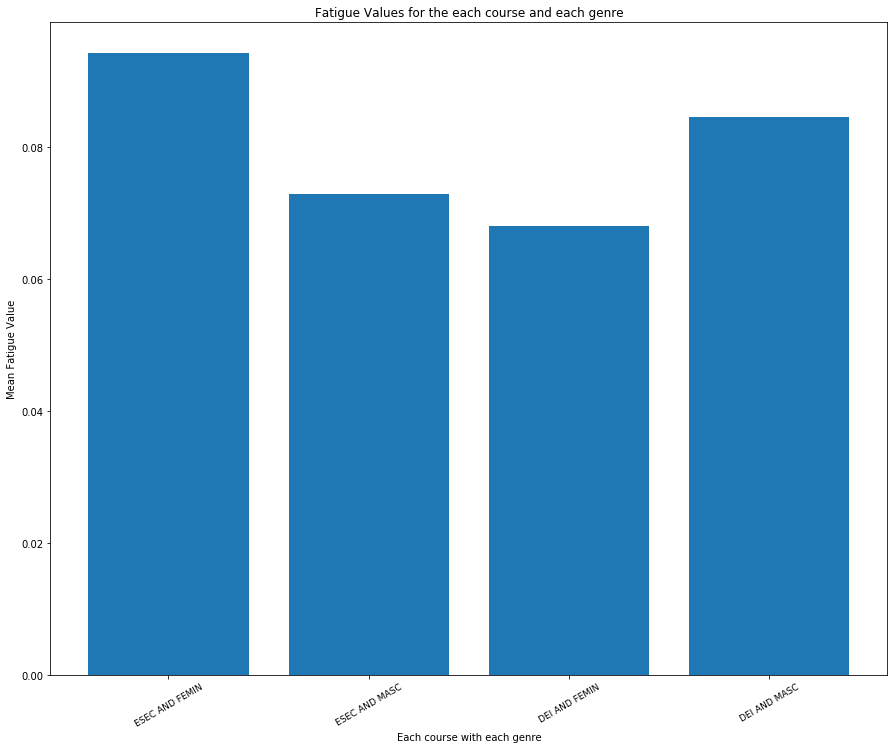

In [4]:
################################
#### PLOT INFO 
################################

# Plot the fatigue values for a specific person
%matplotlib inline  
x = ['ESEC AND FEMIN','ESEC AND MASC', 'DEI AND FEMIN', 'DEI AND MASC']
y = avg
plt.figure(figsize=(15,12))
plt.bar(x,y)
plt.title("Fatigue Values for the each course and each genre")
plt.xlabel('Each course with each genre')
plt.xticks(fontsize=9 , rotation=30)
plt.ylabel('Mean Fatigue Value')
plt.show()